In [133]:
%%capture
%pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Exploración del dataset

In [134]:
file = pd.ExcelFile('./homicidios.xlsx')
df = pd.read_excel(file, 'HECHOS')

In [135]:
df.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [136]:
df.shape

(696, 21)

In [137]:
df.columns.to_list()

['ID',
 'N_VICTIMAS',
 'FECHA',
 'AAAA',
 'MM',
 'DD',
 'HORA',
 'HH',
 'LUGAR_DEL_HECHO',
 'TIPO_DE_CALLE',
 'Calle',
 'Altura',
 'Cruce',
 'Dirección Normalizada',
 'COMUNA',
 'XY (CABA)',
 'pos x',
 'pos y',
 'PARTICIPANTES',
 'VICTIMA',
 'ACUSADO']

In [138]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
N_VICTIMAS,696.0,1.030172,1.0,1.0,1.0,1.0,3.0,0.179393
FECHA,696,2018-09-14 05:12:24.827586048,2016-01-01 00:00:00,2017-04-02 12:00:00,2018-07-12 12:00:00,2020-01-04 06:00:00,2021-12-30 00:00:00,NaN
AAAA,696.0,2018.188218,2016.0,2017.0,2018.0,2020.0,2021.0,1.683754
MM,696.0,6.692529,1.0,4.0,7.0,10.0,12.0,3.571309
DD,696.0,15.936782,1.0,9.0,16.0,23.0,31.0,8.639646
Altura,129.0,3336.635659,30.0,1359.0,2551.0,4500.0,16080.0,3060.641793
COMUNA,696.0,7.425287,0.0,4.0,8.0,11.0,15.0,4.38705


Limpieza del dataset
Primero se observan la cantidad de elementos nulos que tenemos en cada columna
En segundo lugar se eliminarán los elementos duplicados

In [139]:
df.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

Se decide eliminar las columnas 'Altura' y 'Cruce' ya que poseen gran cantidad de elementos faltantes y no se consideran de alta relevancia para el análisis

In [140]:
df = df.drop('Altura', axis=1)
df = df.drop('Cruce', axis=1)

In [141]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Length: 696, dtype: bool

No hay duplicados

Análisis y visualización de datos

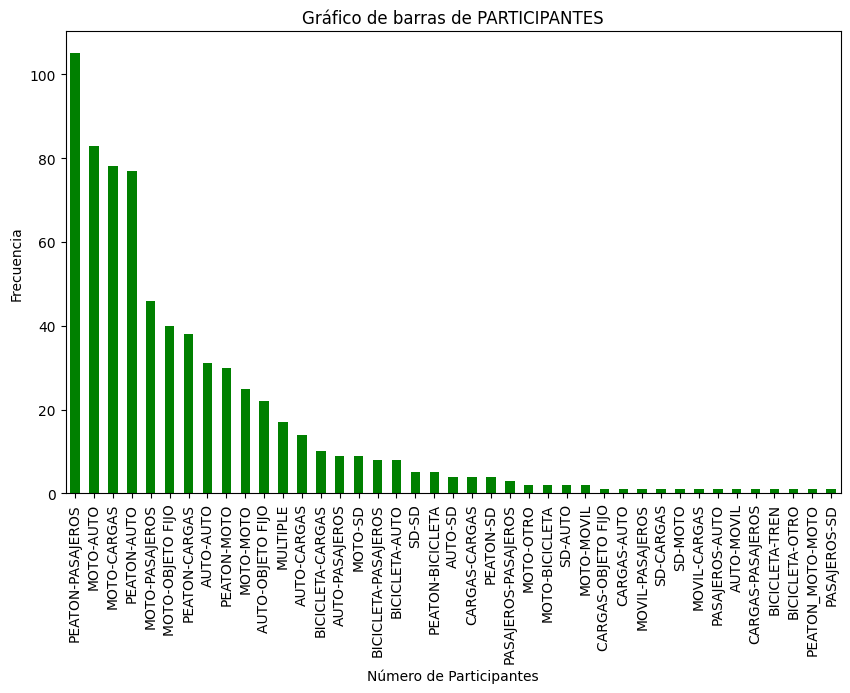

In [142]:
# Gráfico de barras de PARTICIPANTES
plt.figure(figsize=(10, 6))
df['PARTICIPANTES'].value_counts().plot(kind='bar', color='green')
plt.title('Gráfico de barras de PARTICIPANTES')
plt.xlabel('Número de Participantes')
plt.ylabel('Frecuencia')
plt.show()

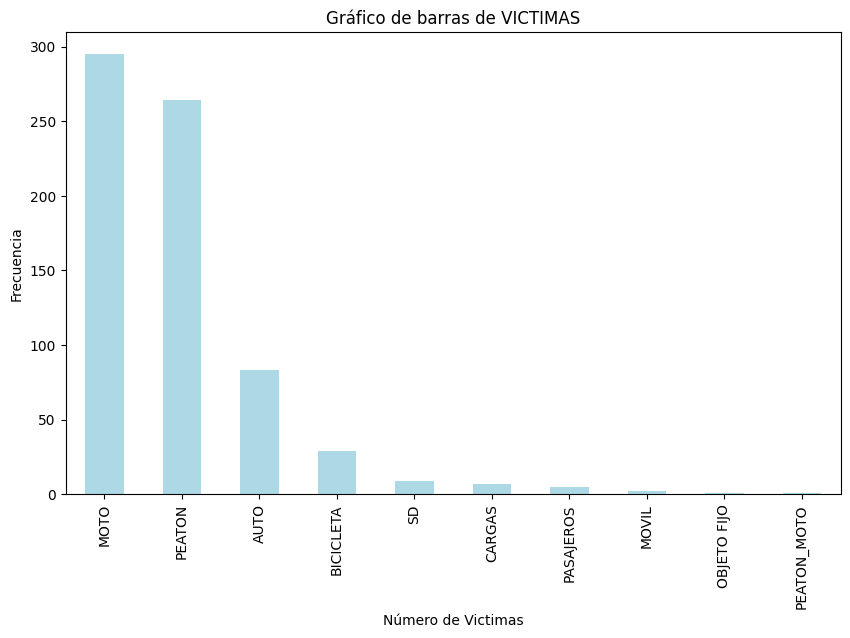

In [143]:
# Gráfico de barras de VICTIMAS
plt.figure(figsize=(10, 6))
df['VICTIMA'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Gráfico de barras de VICTIMAS')
plt.xlabel('Número de Victimas')
plt.ylabel('Frecuencia')
plt.show()

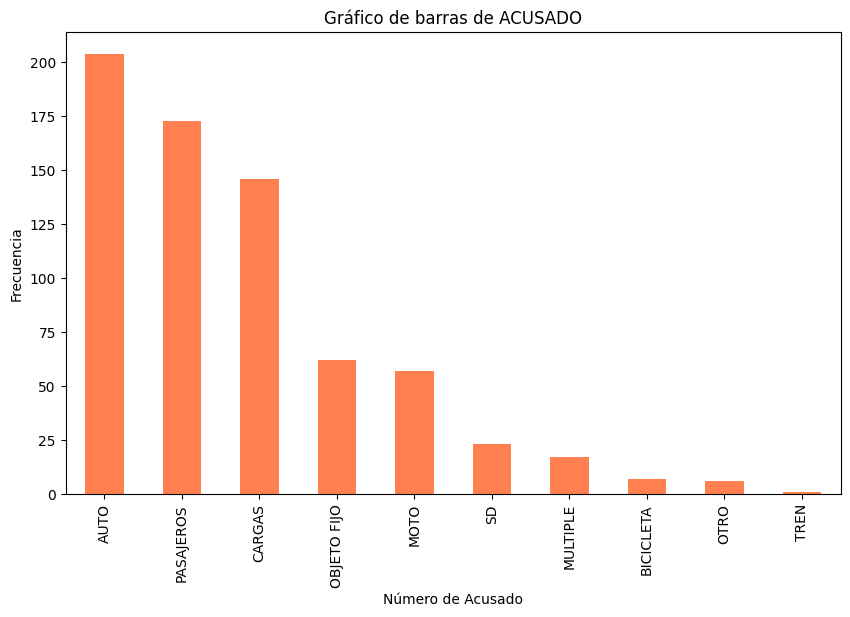

In [144]:
# Gráfico de barras de ACUSADO
plt.figure(figsize=(10, 6))
df['ACUSADO'].value_counts().plot(kind='bar', color='coral')
plt.title('Gráfico de barras de ACUSADO')
plt.xlabel('Número de Acusado')
plt.ylabel('Frecuencia')
plt.show()

<Figure size 1000x600 with 0 Axes>

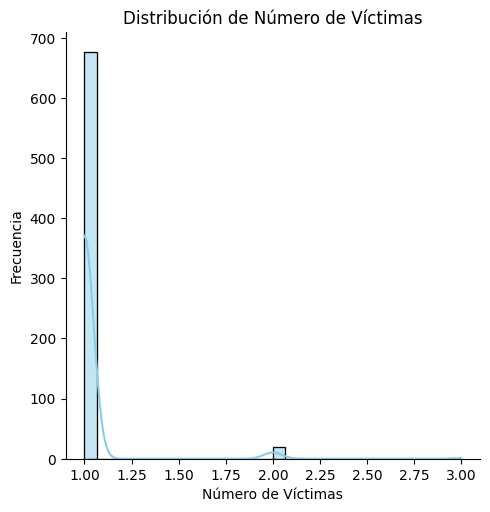

In [145]:
# Distribución de n victimas (Histograma)
plt.figure(figsize=(10, 6))
sns.displot(df['N_VICTIMAS'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Número de Víctimas')
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.show()

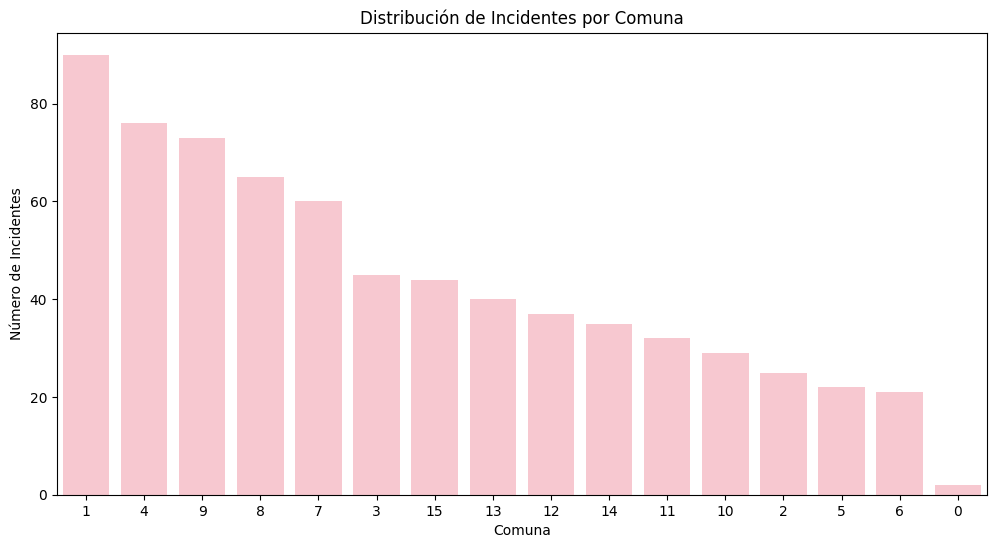

In [146]:
# Distribución de casos por comunas (Gráfico de Barras)
plt.figure(figsize=(12, 6))
sns.countplot(x='COMUNA', data=df, order=df['COMUNA'].value_counts().index, color='pink')
plt.title('Distribución de Incidentes por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de Incidentes')
plt.show()

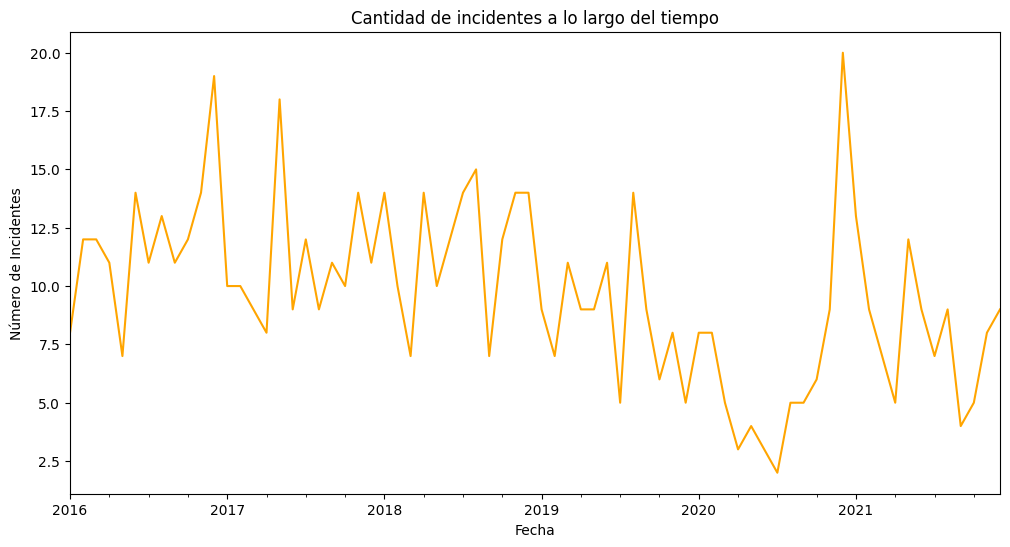

In [147]:
# Análisis temporal (cdad incidentes a lo largo del tiempo)
df['FECHA'] = pd.to_datetime(df['FECHA'])
df.set_index('FECHA', inplace=True)
incidentes_temporales = df.resample('M').size() #Reagrupo por mes
plt.figure(figsize=(12, 6))
incidentes_temporales.plot(title='Cantidad de incidentes a lo largo del tiempo', color='orange')
plt.xlabel('Fecha')
plt.ylabel('Número de Incidentes')
plt.show()

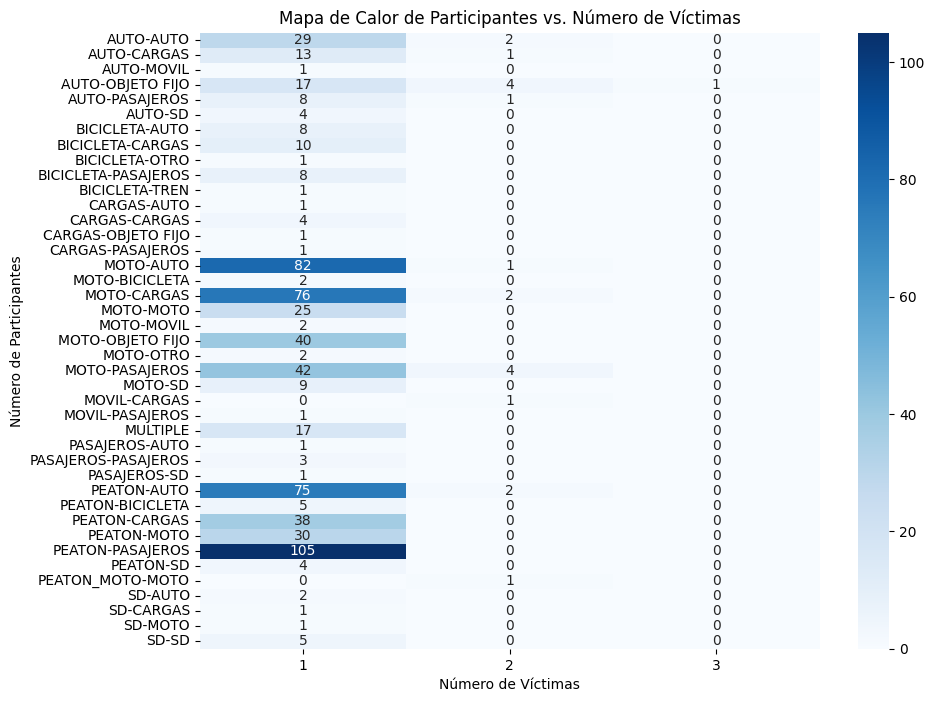

In [148]:
# Mapa de Calor de Participantes vs. Número de Víctimas
plt.figure(figsize=(10, 8))
sns.heatmap(pd.crosstab(df['PARTICIPANTES'], df['N_VICTIMAS']), cmap='Blues', annot=True, fmt='d')
plt.title('Mapa de Calor de Participantes vs. Número de Víctimas')
plt.xlabel('Número de Víctimas')
plt.ylabel('Número de Participantes')
plt.show()